## 岭回归

### 可视化方法确定lambda值

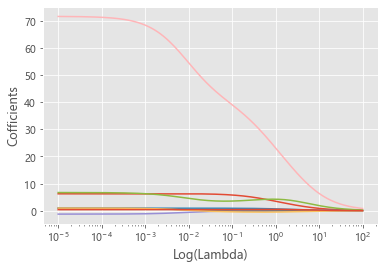

In [8]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV
import matplotlib.pyplot as plt
diabetes = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/diabetes.xlsx")
predictors = diabetes.columns[2:-1] # 构造自变量（剔除前两列和最后一列）
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes[predictors], diabetes['Y'],
                                                                    test_size=0.2, random_state=1234)
Lambdas = np.logspace(-5, 2, 200) # 构造不同的Lambda值
ridge_cofficients = [] # 构造空列表，用于储存模型的偏回归系数
# 循环迭代不同的Lambda值
for Lambda in Lambdas:
    ridge = Ridge(alpha=Lambda, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_cofficients.append(ridge.coef_)

# 绘制alpha的对数与回归系数的关系
# 中文乱码和坐标轴负号的处理
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot') # 设置绘图风格
plt.plot(Lambdas, ridge_cofficients) # 绘图
plt.xscale('log') # 对x轴做对数处理
plt.xlabel('Log(Lambda)')
plt.ylabel('Cofficients')
plt.show()

> 从图中可以看出，当lambda逼近0时，各变量对应的回归系数应该与线性回归模型的最小二乘解完全一致<br> 随着lambda值的不断增加，各回归系数的取值会迅速缩减为0<br> 按照lambda的选择标准，在0.01附近，绝大多数变量的回归系数趋于稳定，所以lambda值可以选择在0.01附近

### 交叉验证法确定lambda值

In [12]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV
import matplotlib.pyplot as plt
diabetes = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/diabetes.xlsx")
predictors = diabetes.columns[2:-1] # 构造自变量（剔除前两列和最后一列）
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes[predictors], diabetes['Y'],
                                                                    test_size=0.2, random_state=1234)
Lambdas = np.logspace(-5, 2, 200) # 构造不同的Lambda值
# 设置交叉验证的参数，对于每一个Lambda值，都执行10重交叉验证
ridge_cv = RidgeCV(alphas=Lambdas, normalize=True, scoring='neg_mean_squared_error', cv=10)
ridge_cv.fit(X_train, y_train) # 模型拟合
ridge_best_Lambda = ridge_cv.alpha_ # 返回最佳的lambda值
ridge_best_Lambda

0.014649713983072863

> 运用10重交叉验证方法得到最佳lambda值为0.0146<br> 该值的评判标准是：对于每一个lambda值计算平均均方误差（MSE），然后从中挑选出最小的平均均方误差，并将对应的lambda值跳出来，作为最佳的惩罚项系数lambda值

### 建模与预测

In [21]:
# 基于最佳的Lambda值建模
ridge = Ridge(alpha=ridge_best_Lambda, normalize=True)
ridge.fit(X_train, y_train)
pd.Series(index=['Intercept']+X_train.columns.tolist(), data=[ridge.intercept_]+ridge.coef_.tolist())

Intercept   -321.996227
BMI            6.206337
BP             0.927093
S1            -0.479414
S2             0.202203
S3             0.016912
S4             4.183247
S5            51.424829
S6             0.384342
dtype: float64

In [22]:
from sklearn.metrics import mean_squared_error
ridge_predict = ridge.predict(X_test) # 模型的预测
RMSE = np.sqrt(mean_squared_error(y_test, ridge_predict)) # 预测效果验证
RMSE

53.1191178875352

## LASSO回归

### 可视化方法确定lambda值

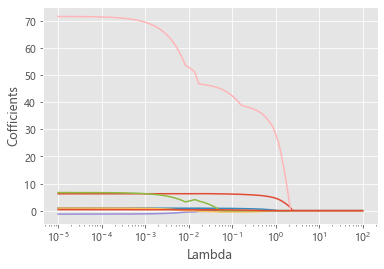

In [23]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Lasso, LassoCV
import matplotlib.pyplot as plt
diabetes = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/diabetes.xlsx")
predictors = diabetes.columns[2:-1] # 构造自变量（剔除前两列和最后一列）
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes[predictors], diabetes['Y'],
                                                                    test_size=0.2, random_state=1234)
Lambdas = np.logspace(-5, 2, 200) # 构造不同的Lambda值

# 构造空列表，用于存储模型的偏回归系数
lasso_cofficients = []
for Lambda in Lambdas:
    lasso = Lasso(alpha=Lambda, normalize=True, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_cofficients.append(lasso.coef_)
plt.plot(Lambdas, lasso_cofficients) # 绘制Lambda与回归系数的折线图
plt.xscale('log') # 对x轴进行对数变换
plt.xlabel('Lambda')
plt.ylabel('Cofficients')
plt.show()

> 初始迭代的lambda值落在10e-5至10e2之间，图中的每条折线同样指代了不同的变量。与岭回归类似，出现了喇叭形说明该变量存在多重共线性<br> 从图中可知，当lambda落在0.05附近时，绝大多数变量的回归系数趋于稳定

### 交叉验证法确定lambda值

In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Lasso, LassoCV
import matplotlib.pyplot as plt
diabetes = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/diabetes.xlsx")
predictors = diabetes.columns[2:-1] # 构造自变量（剔除前两列和最后一列）
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes[predictors], diabetes['Y'],
                                                                    test_size=0.2, random_state=1234)
Lambdas = np.logspace(-5, 2, 200) # 构造不同的Lambda值

lasso_cv = LassoCV(alphas=Lambdas, normalize=True, cv=10, max_iter=10000) # LASSO回归模型的交叉验证
lasso_cv.fit(X_train, y_train)
lasso_best_alpha = lasso_cv.alpha_ # 输出最佳的lambda值
lasso_best_alpha

0.06294988990221888

> 合理的lambda值为0.0629

### 模型的预测

In [4]:
lasso = Lasso(alpha=lasso_best_alpha, normalize=True, max_iter=10000) # 基于最佳的lambda值建模
lasso.fit(X_train, y_train)
# 返回LASSO回归的系数
pd.Series(index=['Intercept'] + X_train.columns.tolist(),
         data=[lasso.intercept_] + lasso.coef_.tolist())

Intercept   -278.560358
BMI            6.188602
BP             0.860826
S1            -0.127627
S2            -0.000000
S3            -0.488408
S4             0.000000
S5            44.487738
S6             0.324076
dtype: float64

In [8]:
from sklearn.metrics import mean_squared_error
lasso_predict = lasso.predict(X_test) # 模型的预测
RMSE = np.sqrt(mean_squared_error(y_test, lasso_predict)) # 预测效果验证
RMSE

53.061437258225745